In [63]:
# 모듈 로딩
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
# 데이터 불러오기
file_path = r'C:\Users\KDP-14\Desktop\VSCode\KDT6\기업 프로젝트\Dataset\비교_data\AI_전_데이터.csv'
file_path2 = r'C:\Users\KDP-14\Desktop\VSCode\KDT6\기업 프로젝트\Dataset\비교_data\AI_후_데이터.csv'

In [65]:
be_dataDF = pd.read_csv(file_path)
af_dataDF = pd.read_csv(file_path2)

In [66]:
be_dataDF

,c_temp_pv,k_rpm_pv,n_temp_pv,scale_pv,s_temp_pv,loss,quality,date_only
0,69.6,189,67.2,3.01,67.1,0.01,A,2023-05-18
1,69.8,189,67.2,3.01,67.0,0.01,A,2023-05-18
2,69.7,189,67.9,3.08,65.9,0.08,A,2023-05-18
3,69.7,189,67.8,3.08,65.9,0.08,A,2023-05-18
4,69.7,189,67.8,3.08,65.9,0.08,A,2023-05-18
...,...,...,...,...,...,...,...,...
232072,69.7,191,67.6,3.11,67.3,0.11,B,2023-10-16
232073,69.8,191,67.5,3.11,67.0,0.11,B,2023-10-16
232074,69.7,191,67.4,3.11,66.8,0.11,B,2023-10-16
232075,69.7,191,67.3,3.11,66.7,0.11,B,2023-10-16


In [67]:
af_dataDF

,c_temp_pv,k_rpm_pv,n_temp_pv,scale_pv,s_temp_pv,loss,quality,date_only
0,69.6,189,67.2,3.010000,67.1,0.010000,A,2023-05-18
1,69.8,189,67.2,3.010000,67.0,0.010000,A,2023-05-18
2,69.7,189,67.9,3.080000,65.9,0.080000,A,2023-05-18
3,69.7,189,67.8,3.080000,65.9,0.080000,A,2023-05-18
4,69.7,189,67.8,3.080000,65.9,0.080000,A,2023-05-18
...,...,...,...,...,...,...,...,...
232070,69.7,191,67.6,3.037833,67.3,0.037833,A,2023-10-16
232071,69.8,191,67.5,3.073500,67.0,0.073500,A,2023-10-16
232072,69.7,191,67.4,3.031850,66.8,0.031850,A,2023-10-16
232073,69.7,191,67.3,3.041250,66.7,0.041250,A,2023-10-16


In [68]:
# 특정 날짜 데이터 필터링
date_input = '2023-05-18'  # 사용자 입력 날짜
be_filtered_df = be_dataDF[be_dataDF['date_only'] == date_input]
af_filtered_df = af_dataDF[af_dataDF['date_only'] == date_input]

In [69]:
# quality 값 세기
be_quality_counts = be_filtered_df['quality'].value_counts()
af_quality_counts = af_filtered_df['quality'].value_counts()
qualities = ['A', 'B', 'C']
be_counts = [be_quality_counts.get(q, 0) for q in qualities]
af_counts = [af_quality_counts.get(q, 0) for q in qualities]

In [70]:
be_counts

[170, 18, 0]

In [71]:
af_counts

[188, 0, 0]

In [72]:
counts = {'before' : be_counts, 'after' : af_counts}

In [73]:
counts

{'before': [170, 18, 0], 'after': [188, 0, 0]}

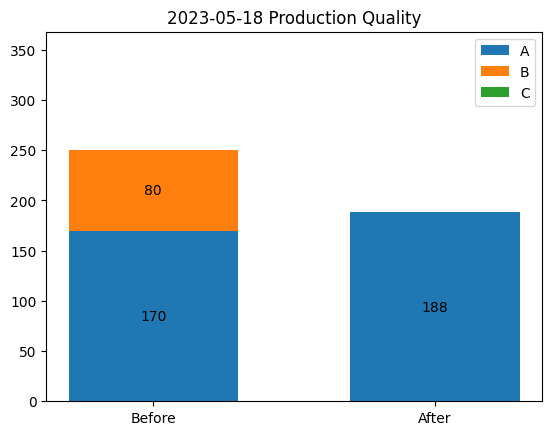

In [86]:
x_labels = ['Before', 'After']
width = 0.6
counts = {
    'A': np.array([170, 188]),
    'B': np.array([80, 0]),
    'C': np.array([0, 0])
}

fig, ax = plt.subplots()
bottom = np.zeros(len(x_labels))  # x_labels의 길이와 동일한 길이로 설정

for i, count in counts.items():
    p = ax.bar(x_labels, count, width, label=i, bottom=bottom)
    bottom += count  # 각 count 값을 누적

    # 값이 0이 아닌 경우에만 수치 표시
    labels = [str(val) if val != 0 else '' for val in count]
    ax.bar_label(p, labels=labels, label_type='center')

# y축 최대값 설정
max_value = sum(max(counts[key]) for key in counts.keys())  # 최댓값 계산
ax.set_ylim(0, max_value + 100)  # 최댓값보다 100 크게 설정

ax.set_title(f'{date_input} Production Quality')
ax.legend()

plt.show()